In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [56]:
df = pd.read_csv('Train.csv')

In [57]:
df.shape

(8523, 12)

In [58]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [59]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Data Cleaning/Preprocessing

In [60]:
df.columns 

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [61]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [62]:
df['Item_Weight'].fillna(method = 'ffill', inplace = True)

In [63]:
df.dropna(inplace = True)

In [64]:
df.shape

(6113, 12)

In [65]:
df = df[['Item_Identifier','Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Establishment_Year',"Outlet_Location_Type",'Outlet_Size','Outlet_Type','Item_Outlet_Sales']]

In [66]:
df.duplicated().sum()

0

In [67]:
store_df = df.copy()

In [68]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'reg', 'LF'], dtype=object)

In [69]:
# Replacing string values with integers
df["Item_Fat_Content"].replace({"Low Fat":0, "Regular":1, "low fat":0, "LF":0, "reg":1}, inplace = True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,0,0.016047,Dairy,249.8092,1999,Tier 1,Medium,Supermarket Type1,3735.1380
1,DRC01,5.920,1,0.019278,Soft Drinks,48.2692,2009,Tier 3,Medium,Supermarket Type2,443.4228
2,FDN15,17.500,0,0.016760,Meat,141.6180,1999,Tier 1,Medium,Supermarket Type1,2097.2700
4,NCD19,8.930,0,0.000000,Household,53.8614,1987,Tier 3,High,Supermarket Type1,994.7052
5,FDP36,10.395,1,0.000000,Baking Goods,51.4008,2009,Tier 3,Medium,Supermarket Type2,556.6088


In [70]:
df["Outlet_Size"].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [71]:
df["Outlet_Size"].replace({"Medium":1, "Small":0, "High":2}, inplace = True)

In [72]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3',
       'Grocery Store'], dtype=object)

In [73]:
df["Outlet_Type"].replace({"Supermarket Type1":1, "Supermarket Type2":2, "Supermarket Type3":3,'Grocery Store':4}, inplace = True)

In [74]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [75]:
df["Outlet_Location_Type"].replace({"Tier 1":1, "Tier 2":2, "Tier 3":3}, inplace = True)

In [76]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Location_Type           int64
Outlet_Size                    int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

In [77]:
df.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.025630,-0.007051,0.022404,-0.001260,0.013158,0.017707,-0.013026,0.010721
Item_Fat_Content,-0.025630,1.000000,0.047486,0.011656,0.003629,-0.002116,0.000979,-0.003690,0.013739
Item_Visibility,-0.007051,0.047486,1.000000,-0.000651,-0.087452,-0.103078,-0.096773,0.178340,-0.105854
Item_MRP,0.022404,0.011656,-0.000651,1.000000,0.011632,0.000321,-0.005827,-0.012082,0.588939
Outlet_Establishment_Year,-0.001260,0.003629,-0.087452,0.011632,1.000000,-0.089391,-0.298431,-0.456910,-0.057850
Outlet_Location_Type,0.013158,-0.002116,-0.103078,0.000321,-0.089391,1.000000,0.635185,0.162090,0.206719
Outlet_Size,0.017707,0.000979,-0.096773,-0.005827,-0.298431,0.635185,1.000000,-0.125048,0.129076
Outlet_Type,-0.013026,-0.003690,0.178340,-0.012082,-0.456910,0.162090,-0.125048,1.000000,-0.081497
Item_Outlet_Sales,0.010721,0.013739,-0.105854,0.588939,-0.057850,0.206719,0.129076,-0.081497,1.000000


## Data Visualization

In [78]:
store_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Tier 1,Medium,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Tier 3,Medium,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,1999,Tier 1,Medium,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,1987,Tier 3,High,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,2009,Tier 3,Medium,Supermarket Type2,556.6088


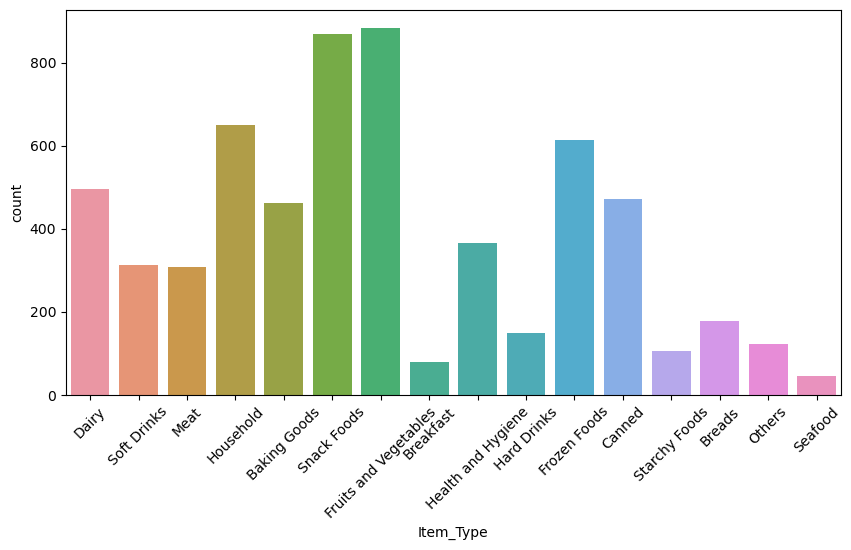

In [79]:
# bar graph
plt.figure(figsize = (10, 5))
cp = sns.countplot(data = store_df, x = 'Item_Type')
tick = cp.set_xticklabels(cp.get_xticklabels(), rotation=45)

<AxesSubplot:ylabel='None'>

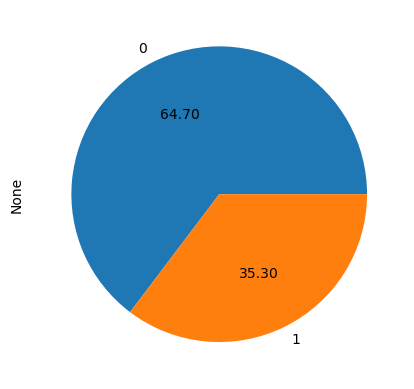

In [80]:
# pie plot
df.groupby('Item_Fat_Content').size().plot(kind='pie', autopct='%.2f')

<function matplotlib.pyplot.show(close=None, block=None)>

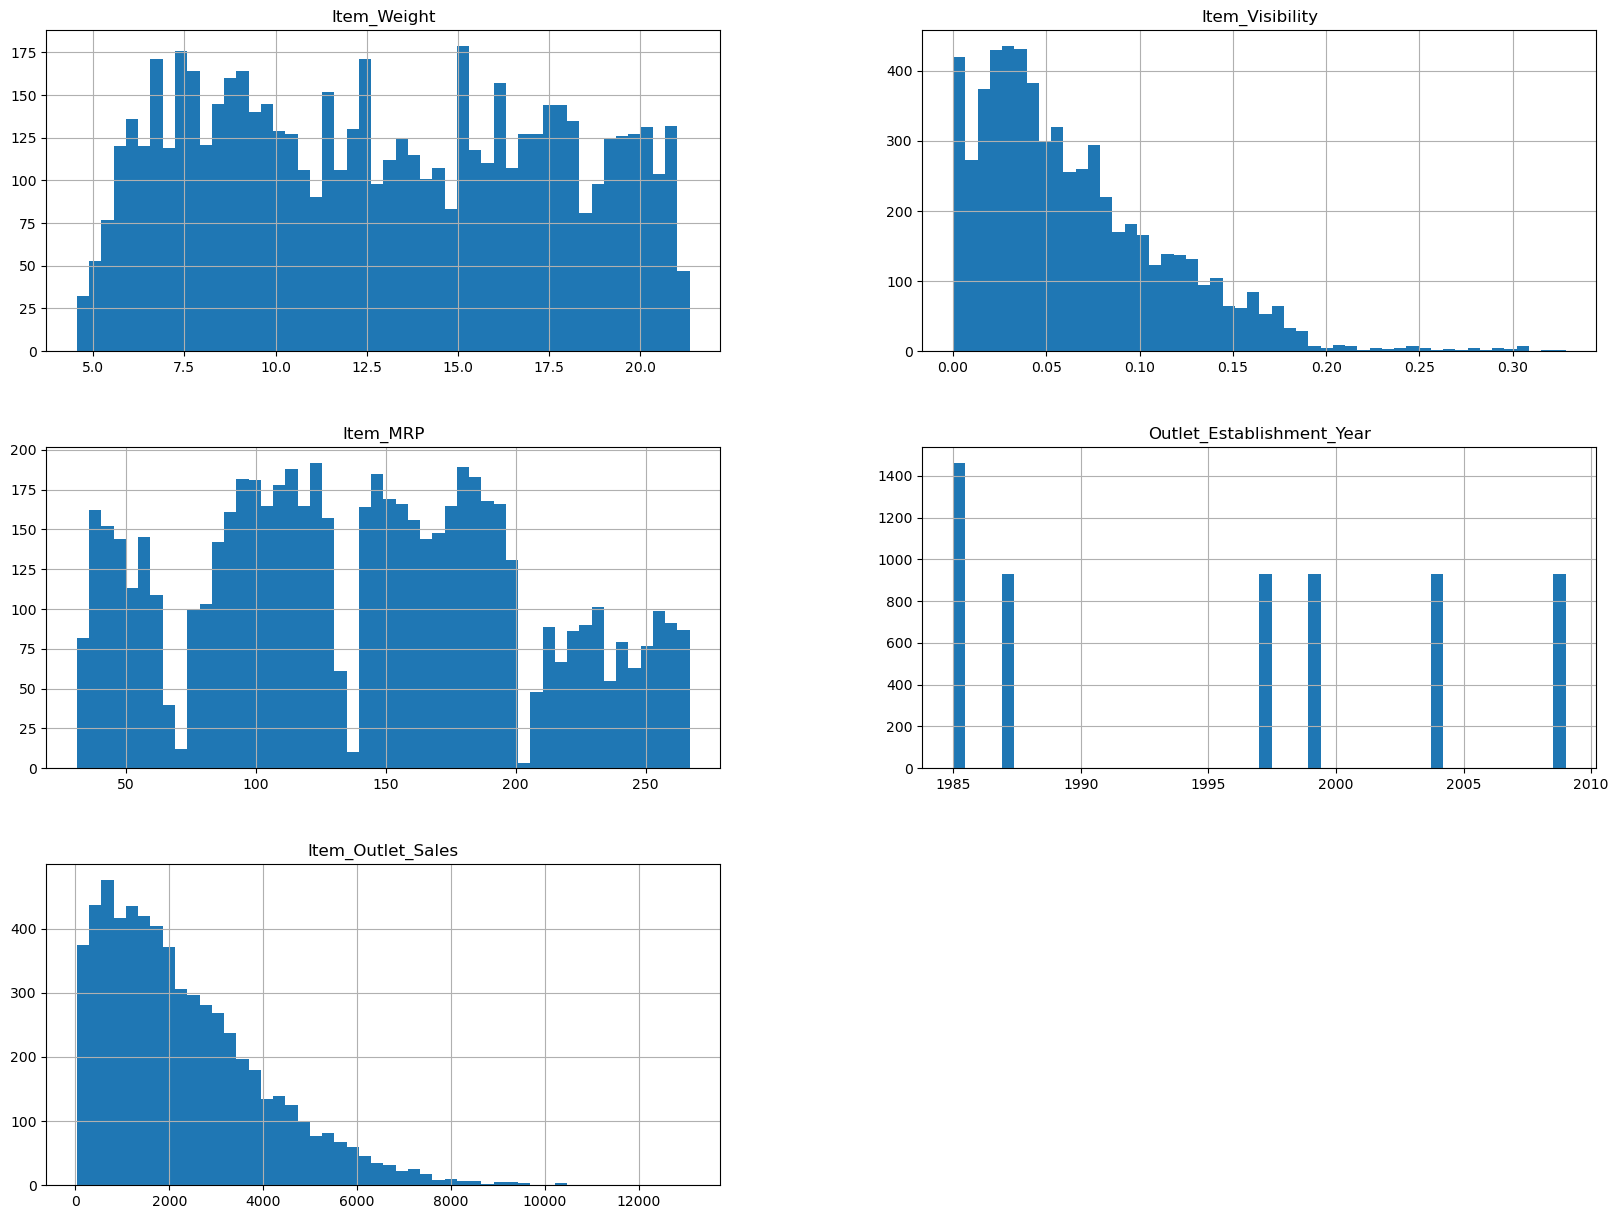

In [81]:
store_df.hist(bins=50, figsize=(20, 15))
plt.show

<AxesSubplot:xlabel='Item_MRP'>

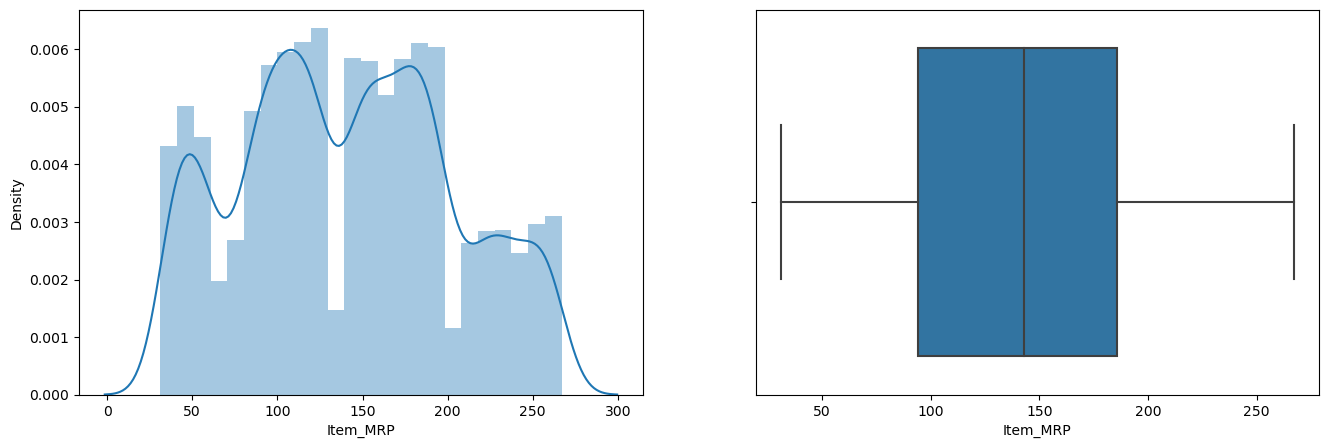

In [82]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(store_df['Item_MRP'])
plt.subplot(1,2,2)
sns.boxplot(store_df['Item_MRP'])

<AxesSubplot:>

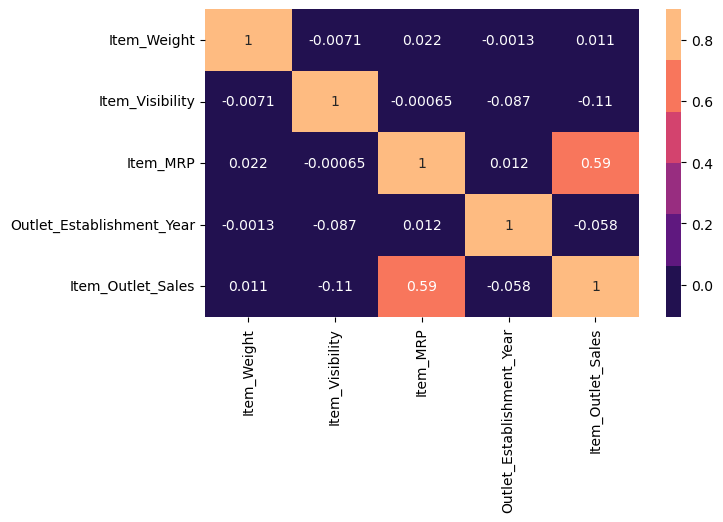

In [83]:
plt.figure(figsize = (7, 4))

color = sns.color_palette('magma')
sns.heatmap(store_df.corr(), vmax = 0.9, annot = True, cmap = color)

## Class imbalance

In [84]:
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns

In [85]:
X = df.drop("Item_Fat_Content", axis = 1)
y = df['Item_Fat_Content']

In [86]:
oversample = RandomOverSampler(sampling_strategy='minority')

X_resampled, y_resampled = oversample.fit_resample(X, y)

In [90]:
X_resampled.shape

(7910, 10)

In [91]:
new_df_balanced = pd.concat([X_resampled, y_resampled], axis = 1)

In [92]:
new_df_balanced.shape

(7910, 11)

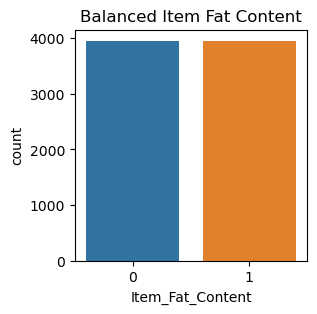

In [93]:
plt.figure(figsize = (3,3))
sns.countplot(x = 'Item_Fat_Content', data=new_df_balanced)
plt.title("Balanced Item Fat Content")
plt.show()

## Data Partition

In [99]:
new_df_balanced.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Outlet_Sales,Item_Fat_Content
0,FDA15,9.300,0.016047,Dairy,249.8092,1999,1,1,1,3735.1380,0
1,DRC01,5.920,0.019278,Soft Drinks,48.2692,2009,3,1,2,443.4228,1
2,FDN15,17.500,0.016760,Meat,141.6180,1999,1,1,1,2097.2700,0
3,NCD19,8.930,0.000000,Household,53.8614,1987,3,2,1,994.7052,0
4,FDP36,10.395,0.000000,Baking Goods,51.4008,2009,3,1,2,556.6088,1


In [100]:
from sklearn.model_selection import train_test_split

X = new_df_balanced[["Item_Outlet_Sales","Item_MRP","Item_Weight",'Item_Visibility']]
# X = df[["Item_Outlet_Sales","Item_MRP","Item_Weight",'Item_Visibility','Outlet_Location_Type','Outlet_Size','Outlet_Type']]
y = new_df_balanced['Item_Fat_Content']

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [101]:
print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (6328, 4)
y_train (6328,)
X_test (1582, 4)
y_test (1582,)


## Selection and Training the Model

### Model 1 (Logistic Regression Classifier)

In [102]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(X_train,y_train)

LogisticRegression()

In [103]:
y_pred1=model1.predict(X_test)

In [104]:
from sklearn.metrics import accuracy_score
print("Accuracy Score of Logistic Regression is ",accuracy_score(y_test, y_pred1))

Accuracy Score of Logistic Regression is  0.52275600505689


### model2 ( Neive Bayes Classifier )

In [105]:
from sklearn.naive_bayes import GaussianNB
model2 = GaussianNB()
model2.fit(X_train,y_train)

GaussianNB()

In [106]:
y_pred2=model2.predict(X_test)
y_pred2

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [107]:
from sklearn.metrics import accuracy_score
print("Accuracy Score of Naive Bayes algorithm is ",accuracy_score(y_test, y_pred2))

Accuracy Score of Naive Bayes algorithm is  0.5240202275600506


In [108]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred2)
cm

array([[398, 394],
       [359, 431]], dtype=int64)

### model3 (RandomForestClassifier)

In [109]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()
model3.fit(X_train, y_train)

RandomForestClassifier()

In [110]:
y_pred3 = model3.predict(X_test)

In [111]:
cm2 = confusion_matrix(y_test, y_pred3)
cm2

array([[717,  75],
       [ 75, 715]], dtype=int64)

Text(20.72222222222222, 0.5, 'Actual')

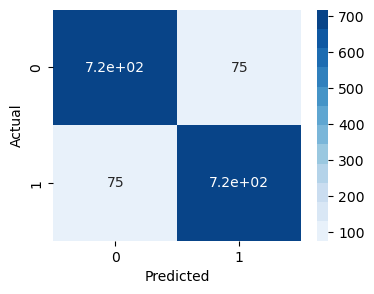

In [112]:
plt.figure(figsize = (4,3))
sns.heatmap(cm2, annot = True, cmap = sns.color_palette("Blues",12))
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [113]:
print("Accuracy Score of RandomForestClassifier is ",accuracy_score(y_test, y_pred3))

Accuracy Score of RandomForestClassifier is  0.9051833122629582


### model4 (DecisionTreeClassifier)

In [114]:
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier()

model4.fit(X_train, y_train)


DecisionTreeClassifier()

In [115]:
y_pred4 = model4.predict(X_test)

In [116]:
cm4 = confusion_matrix(y_test, y_pred4)
cm4

array([[632, 160],
       [ 88, 702]], dtype=int64)

Text(20.72222222222222, 0.5, 'Actual')

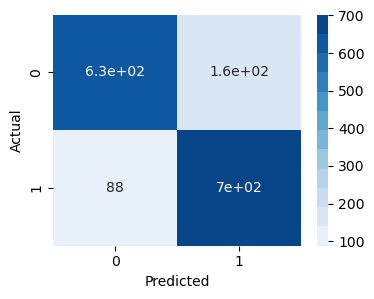

In [117]:
plt.figure(figsize = (4,3))
sns.heatmap(cm4, annot = True, cmap = sns.color_palette("Blues",12))
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [118]:
print("Accuracy Score of Decision TreeClassifier is ",accuracy_score(y_test, y_pred4))

Accuracy Score of Decision TreeClassifier is  0.843236409608091


In [119]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       792
           1       0.91      0.91      0.91       790

    accuracy                           0.91      1582
   macro avg       0.91      0.91      0.91      1582
weighted avg       0.91      0.91      0.91      1582



#### Model 5 (KNN Classifier)

In [120]:
from sklearn.neighbors import KNeighborsClassifier
model5 = KNeighborsClassifier()
model5.fit(X_train, y_train)

KNeighborsClassifier()

In [121]:
y_pred5 = model5.predict(X_test)

In [122]:
print("Accuracy Score of Decision TreeClassifier is ",accuracy_score(y_test, y_pred5))

Accuracy Score of Decision TreeClassifier is  0.5847029077117573


### Conclusion:

After Testting different Classification algorithms (Logistic Regression, DecisionTree, Naive Bayes, RandomForest) we
came to conclude that for bigmart sales dataset RandomForest is the best classifier (Algorithm),since it has most accuracy 
out of all Four..